In [20]:
from tensorflow.contrib.keras import applications as app
from tensorflow.contrib.keras import preprocessing as pp
from tensorflow.keras.models import load_model
import numpy as np
import operator
from matplotlib.pyplot import imshow
from PIL import Image
from tensorflow.keras.models import model_from_json
from tensorflow.keras.utils import CustomObjectScope
from tensorflow.keras.initializers import glorot_uniform

In [21]:
model = load_model('modelsmall.h5')

In [28]:
img_path = '/home/ubuntu/test5.jpg'
img = pp.image.load_img(path=img_path, target_size=(155, 155))
processed_img = pp.image.img_to_array(img)
processed_img = np.expand_dims(processed_img, axis=0)
processed_img = app.xception.preprocess_input(processed_img)

preds = model.predict(processed_img)
preds = np.ravel(preds)
index, value = max(enumerate(preds), key=operator.itemgetter(1))
print(index)

8


In [29]:
vowel = ["A","E","I","O","U"]
species_decode = ["American Crow",
                  "American Goldfinch", 
                  "American Robin",  
                  "Blue Jay", 
                  "Cedar Waxwing", 
                  "Chickadee",
                  "Common Starling",
                  "Downy Woodpecker",
                  "Northern Cardinal",
                  "Mourning Dove",
                  "Prarie Warbler", 
                  "Redheaded Woodpecker",  
                  "Ruby-Throated Hummingbird",
                  "Sparrow",
                  "Tufted Titmouse"]

species = species_decode[index] 
if species[0] in vowel: # Who likes proper grammar?
    species = "A little birdy told me this is an " + species + "."
else: 
    species = "A little birdy told me this is a " + species + "."

A little birdy told me this is a Northern Cardinal.


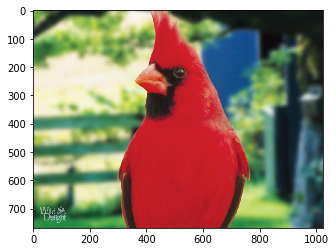

In [30]:
%matplotlib inline
pil_im = Image.open(img_path, 'r')
imshow(np.asarray(pil_im))
print(species)